# COURSE:   PGP [AI&ML]

## Learner :  Chaitanya Kumar Battula
## Module  : Advanced Deep Learning
## Topic   : Apply scikit's RBM to MNIST to generate some new images with Gibbs sampling


# **Problem Statement:**<br> 
Consider the MNIST dataset and the classification model from the previous lesson for image classification. Now to increase the model accuracy, the training data must be increased. Apply the concept of RBM as they are also known for their ability to reconstruct images.

## **Objective:**<br> 
Apply scikit's RBM to MNIST to generate some new images with Gibbs sampling.

### **Solution:**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline   
plt.rcParams['image.cmap'] = 'gray'

import pandas as pd

In [2]:
def gen_mnist_image(X):
    return np.rollaxis(np.rollaxis(X[0:200].reshape(20, -1, 28, 28), 0, 2), 1, 3).reshape(-1, 20 * 28)

In [3]:
X_train = pd.read_csv('train (1).csv').values[:,1:]
X_train = (X_train - np.min(X_train, 0)) / (np.max(X_train, 0) + 0.0001)  # 0-1 scaling

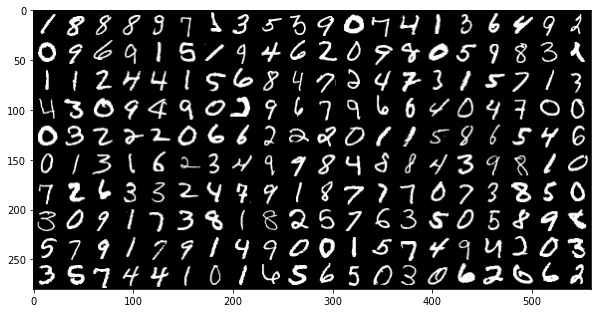

In [4]:
plt.figure(figsize=(10,20))
plt.imshow(gen_mnist_image(X_train))

In [5]:
from sklearn.neural_network import BernoulliRBM
rbm = BernoulliRBM(n_components=100, learning_rate=0.01, random_state=0, verbose=True)
rbm.fit(X_train)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -119.88, time = 6.08s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -104.69, time = 7.32s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -97.89, time = 7.16s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -93.23, time = 7.16s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -90.60, time = 7.22s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -88.40, time = 7.14s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -85.96, time = 7.23s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -85.02, time = 7.28s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -83.87, time = 7.16s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -82.76, time = 7.41s


BernoulliRBM(learning_rate=0.01, n_components=100, random_state=0, verbose=True)

In [6]:
xx = X_train[:40].copy()
for ii in range(1000):
    for n in range(40):
        xx[n] = rbm.gibbs(xx[n])

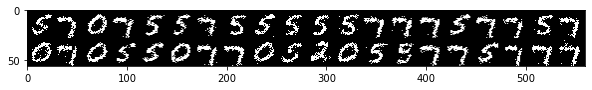

In [7]:
plt.figure(figsize=(10,20))
plt.imshow(gen_mnist_image(xx))

In [8]:
xx = X_train[:40].copy()
for ii in range(10000):
    for n in range(40):
        xx[n] = rbm.gibbs(xx[n])

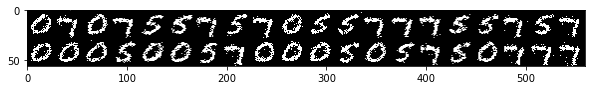

In [9]:
plt.figure(figsize=(10,20))
plt.imshow(gen_mnist_image(xx))

Text(0.5, 0.98, '100 components extracted by RBM')

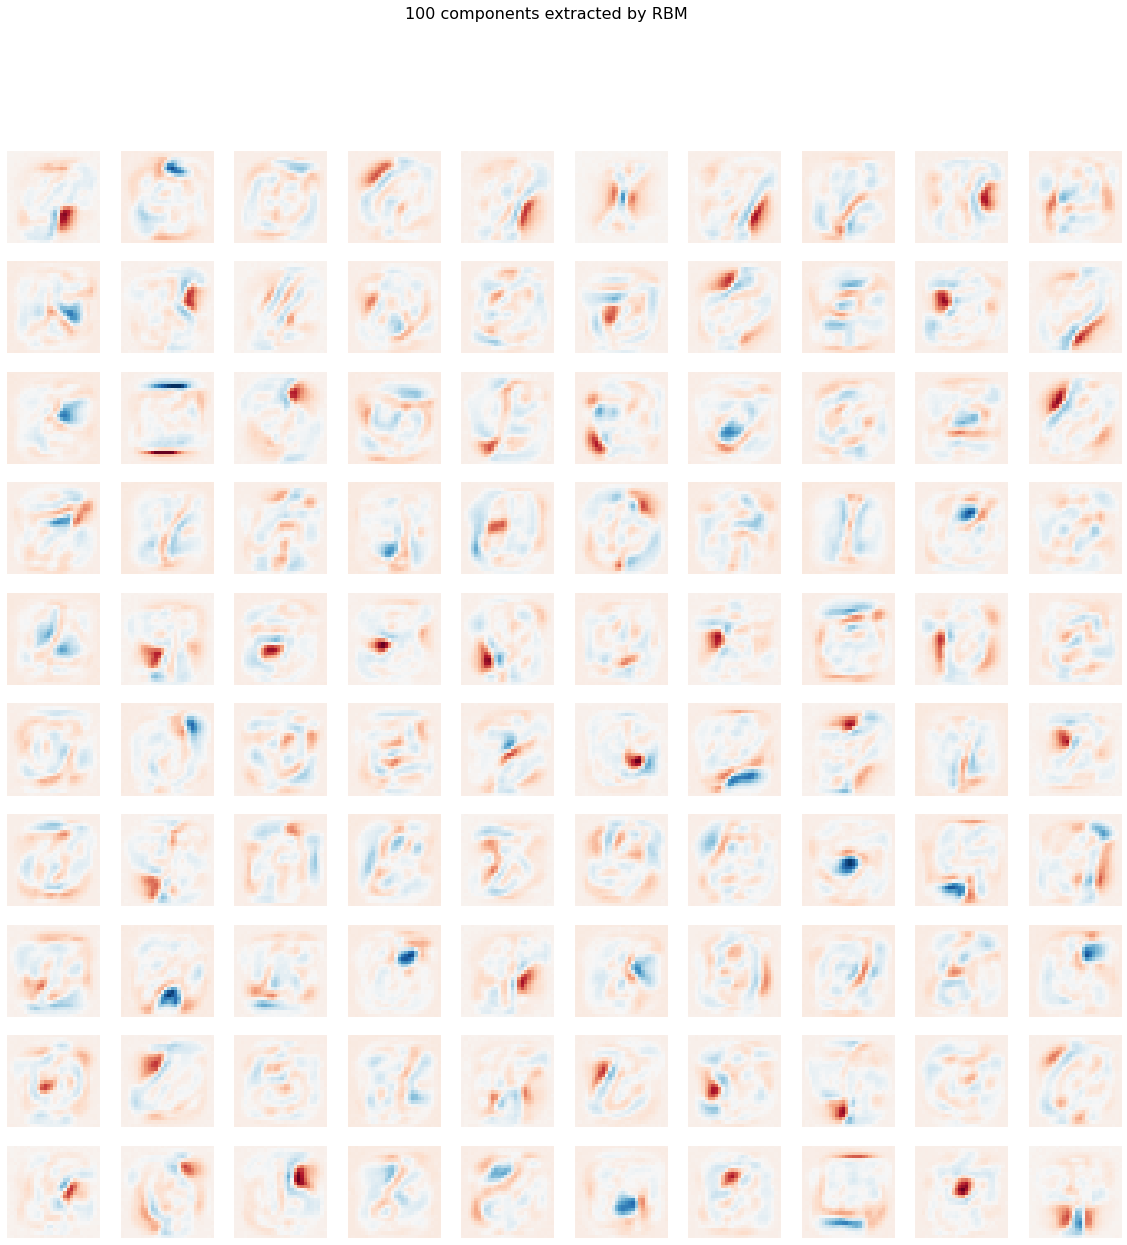

In [10]:
plt.figure(figsize=(20, 20))
for i, comp in enumerate(rbm.components_):
    plt.subplot(10, 10, i + 1)
    plt.imshow(comp.reshape((28, 28)), cmap=plt.cm.RdBu,
               interpolation='nearest', vmin=-2.5, vmax=2.5)
    plt.axis('off')
plt.suptitle('100 components extracted by RBM', fontsize=16)